### <font color="brown">Problem Set 8: NumPy</font>

In [36]:
import numpy as np

---

#### Problem 1 

**Mean normalizing** is a common data pre-processing step used in data science. <br>Write a function that replaces all nan values in a 2D ndarray with zero. Then, perform mean normalization i.e. subtract, from all items of each row, the mean value of that row.

In [37]:
# e.g. input array
X = np.array([[5,6,np.nan,7],[1,np.nan,0,5],[-1,5,np.nan,2]])

def mean_nornmalize(np_arr):
    np_arr = np.nan_to_num(np_arr)    # replace nan with 0
    Y = np_arr - np_arr.mean(axis=1, keepdims=True)
    return Y

print(X)
print("\n")

Y = mean_nornmalize(X)
print(Y)

[[ 5.  6. nan  7.]
 [ 1. nan  0.  5.]
 [-1.  5. nan  2.]]


[[ 0.5  1.5 -4.5  2.5]
 [-0.5 -1.5 -1.5  3.5]
 [-2.5  3.5 -1.5  0.5]]


---

#### Problem 2

Given a 2D ndarray with n rows and k columns, where the rows are students, and the columns are scores on quizzes (integer, between 0 and 20, inclusive), compute a result NumPy array of size k x 3 with the max, min, and average score on each quiz, and, separately, the average class score on all quizzes combined.

In [38]:
scores = np.array([[10, 15, 20], [15, 20, 10], [20, 10, 15]])

# result = np.array([[20., 10., 15.], [20., 10., 15.], [20., 10., 15.]])
# average_class_score = 15.0

def analyze_quiz_scores():
    pass

SyntaxError: invalid syntax (2174747455.py, line 7)

---

#### Problem 3

Write a function that takes a 2D ndarray and cycles the rows up by 1 so that the first row becomes the last, the last becomes second-to-last, etc. 

In [ ]:
test_arr = np.arange(1,10).reshape(3,3)
print(test_arr)
a = test_arr[[2,1,0]] # shuffle rows

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
def cycle_rows(array):
    to_end = array[1:]
    first_row = array[0:1]
    array = np.concatenate((to_end, first_row), axis=0)
    return array

# cycle_rows(test_arr)

arr2 = np.array([[11, 8, 5],
                 [9, 7, 8],
                 [12, 1, 3],
                 [7, 7, 11]])

cycle_rows(arr2)

array([[ 9,  7,  8],
       [12,  1,  3],
       [ 7,  7, 11],
       [11,  8,  5]])

In [ ]:
def rowcycle(ndarr):
    cycle = list(range(1,ndarr.shape[0])) + [0]
    return ndarr[cycle]
rowcycle(test_arr)

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

In [ ]:
def rowcycle(ndarr):
    return np.roll(ndarr,-1,axis=0)
rowcycle(test_arr)

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

---

#### Problem 4

Write a function that takes an ndarray and computes the standard deviation of the values in each row, without using the standard deviation function. It should return an array with these standard deviations. 
See https://www.mathsisfun.com/data/standard-deviation-formulas.html

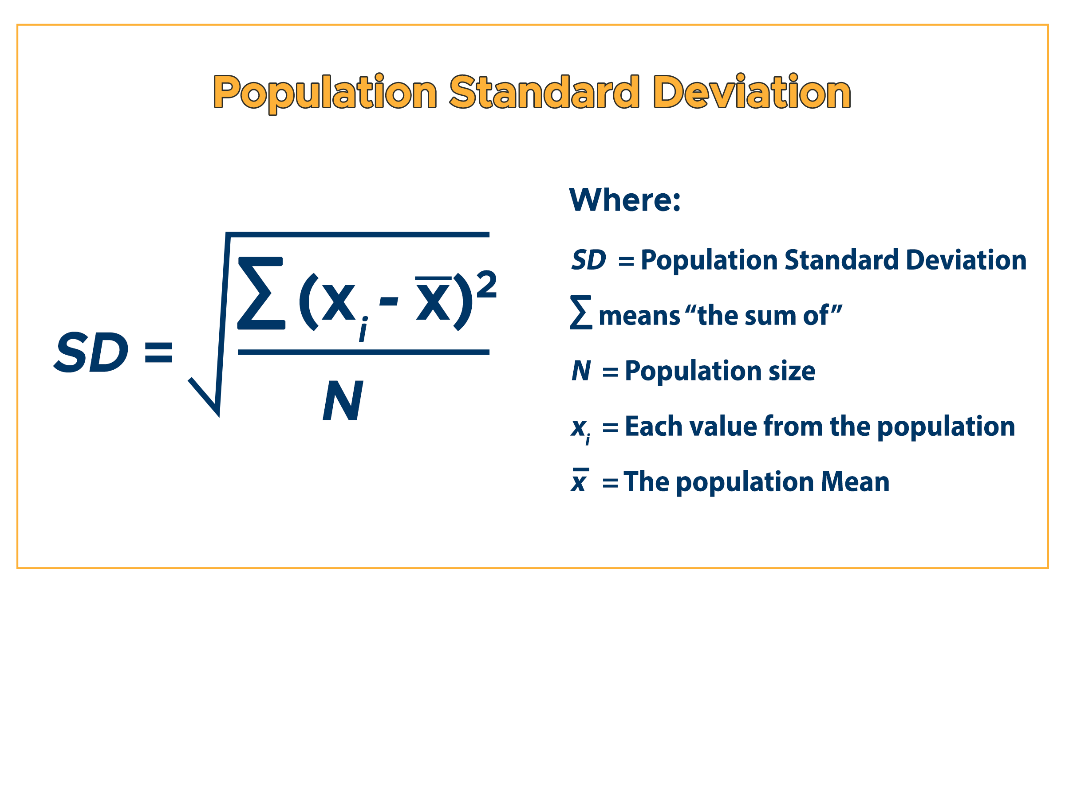

In [39]:
test_arr = np.arange(1,10).reshape(3,3)
arr = np.array([[3,1,-2],[1,8,2],[6,1,5]])
print(test_arr)
# array([0.81649658, 0.81649658, 0.81649658])
print(test_arr.std(axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[0.81649658 0.81649658 0.81649658]


In [40]:
def compute_standard_deviation(array):
    means =  np.mean(array, axis=1, keepdims=True)
    squared_deviation = (array - means) ** 2
    variance = np.mean(squared_deviation, axis=1)
    std = np.power(variance, 0.5)
    return std

compute_standard_deviation(test_arr)
compute_standard_deviation(arr)

array([2.05480467, 3.09120617, 2.1602469 ])

---

#### Problem 5:

Create a 2D ndarray of shape 5x3 to contain random decimal numbers between 5 and 10. Get the position (index) of the two largest numbers in each row. From the generated 2D array, replace all values greater than 8 with 10, and all values less than 6 with 5.

In [ ]:
import random
# Opt 1
a = np.random.randint(low=5, high=10, size=(5,3)) + np.random.random((5,3))
# Opt 2: size specifies the shape of arr 
a = np.random.uniform(5,10, size=(5,3))

# get 2 largest numbers from the array in each row
# np.flip flips the numbers of the specified axis
max_pos = np.flip(np.argsort(a, axis=1), axis=1)
max_pos = max_pos[:,:2]

new_arr = np.where(a < 6, 5, np.where(a > 8, 10, a))
print(new_arr)

[[8.97311965 9.42881327 5.59753837]
 [8.18566485 9.87862665 6.28057059]
 [9.51860567 6.72876305 8.76677375]
 [9.2633898  9.41876741 7.06701423]
 [8.77030134 6.54462708 5.03073642]]


[[1 0]
 [1 0]
 [0 2]
 [1 0]
 [0 1]]


[[10.         10.          5.        ]
 [10.         10.          6.28057059]
 [10.          6.72876305 10.        ]
 [10.         10.          7.06701423]
 [10.          6.54462708  5.        ]]


---

#### Problem 6:

Generate *one-hot encodings* for a list of values (classes). One-hot encoding and its applications are explained in the following resources: 
1. https://en.wikipedia.org/wiki/One-hot
2. https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

Write a function that takes a 1-d List as input and return a 2-d Numpy array where the rows are the one-hot encoding of the classes in the list. Eg: Input: ['cat','camel','dog','cat'] <br>
Output: [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0]]

In [ ]:
def one_hot_encoding(l):
    arr = np.array(l) # convert list to nparray
    num_classes = np.unique(arr) # find unqiue classes
    encoding = np.zeros((arr.shape[0], num_classes.shape[0]))
    for i, k in enumerate(arr):
        encoding[i, k-1] = 1
    return encoding

In [ ]:
l = [1,2,0,1,2]
encoding = one_hot_encoding(l)
print(encoding)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
